In [1]:
import biosonic
print(biosonic.__file__)

/Users/lenagies/Desktop/Master/Nebenjob/biosonic/src/biosonic/__init__.py


In [2]:
import numpy as np
from scipy.signal import chirp
from biosonic.plot import plot_filterbank_and_cepstrum, plot_spectrogram, plot_cepstrum, plot_cepstral_coefficients
from biosonic.filter import mel_filterbank, log_filterbank
from biosonic.compute.spectrotemporal import cepstral_coefficients, spectrogram, cepstrum
from biosonic.handle import read_wav

In [3]:
n_filters = 20
n_fft = 1024
n_ceps = 32

f1 = 200
f2 = 5000
duration = 1
sr = 16000
time = np.linspace(0, duration, int(sr * duration), endpoint=False)
x = chirp(time, f1, 1, f2, method='hyperbolic')# + np.random.normal(0, .5, size=time.shape)

In [4]:
from biosonic.compute.utils import hz_to_mel

hz_to_mel(200)

np.float64(652.1609413889511)

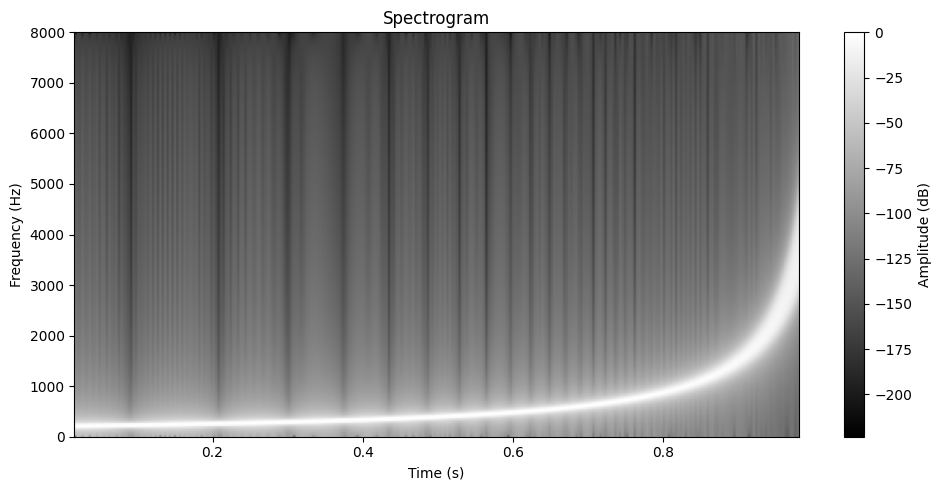

0.0 7479.923826452316


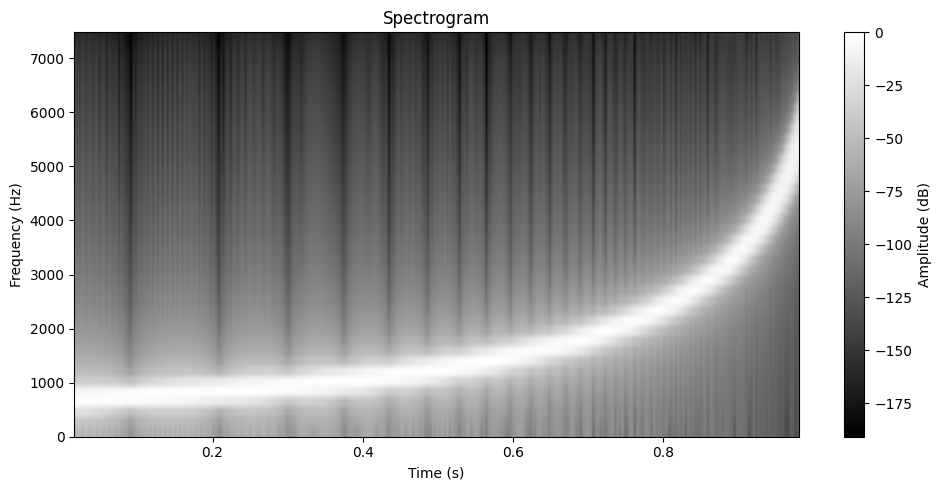

[119.15810817 141.98654744 169.18848379 201.60179653 240.2248868 ]
119.15810817484848 6713.768892890679


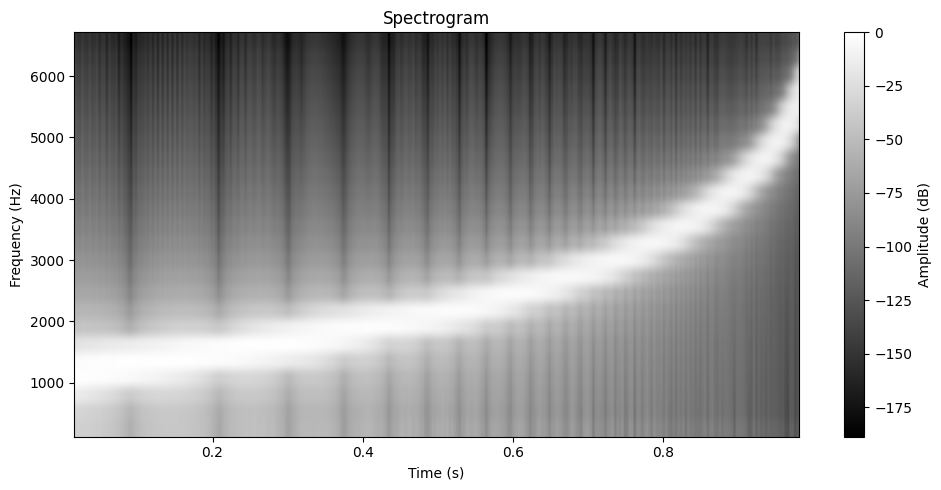

<Axes: title={'center': 'Spectrogram'}, xlabel='Time (s)', ylabel='Frequency (Hz)'>

In [5]:
plot_spectrogram(x, sr=sr, window='hann', window_length=512, overlap=90, cmap='grey')
plot_spectrogram(x, sr=sr, window='hann', window_length=512, overlap=90, cmap='grey', freq_scale="mel")
plot_spectrogram(x, sr=sr, window='hann', window_length=512, overlap=90, cmap='grey', freq_scale="log", flim=(100, 8000), n_bands=24)

Framed audio shape: (32, 1024)
(513, 32)
(32, 1024)
(32, 513)
(40, 32)


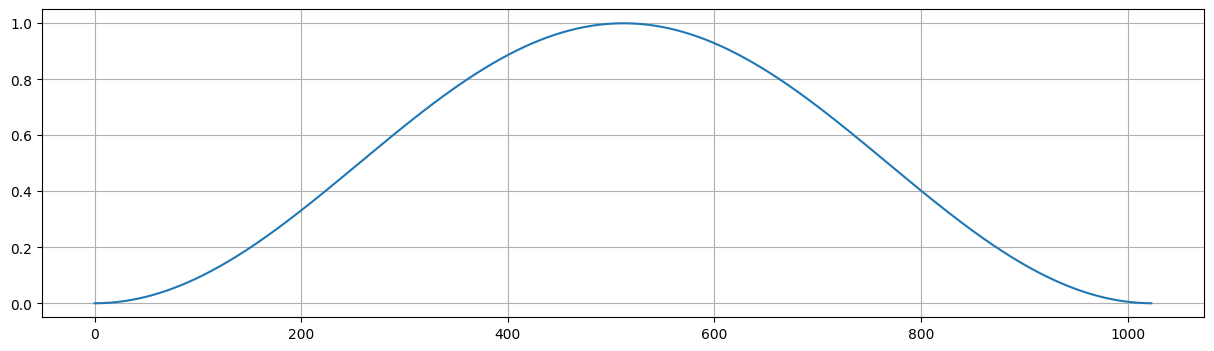

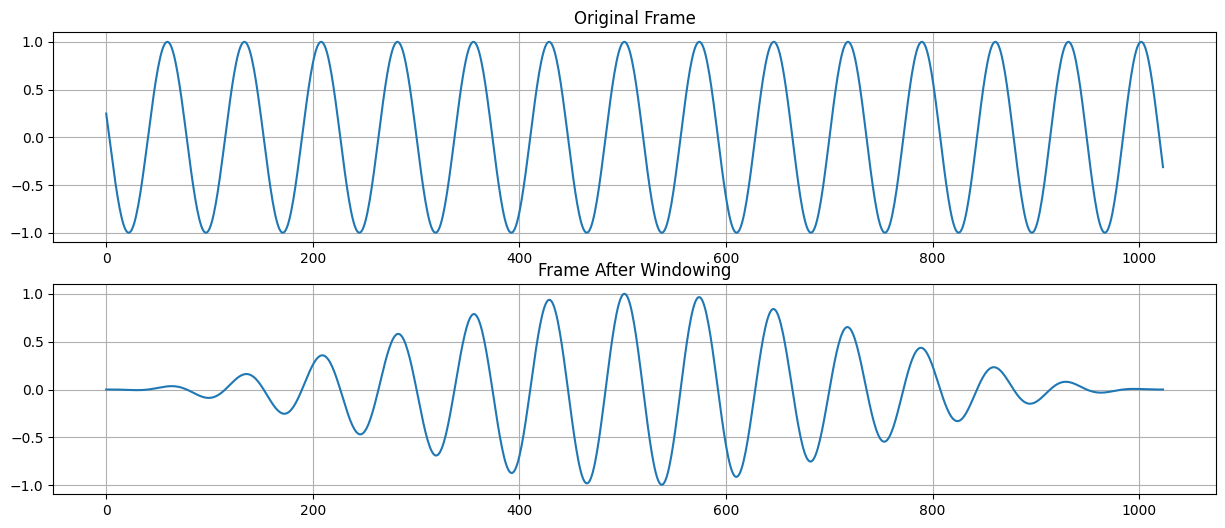

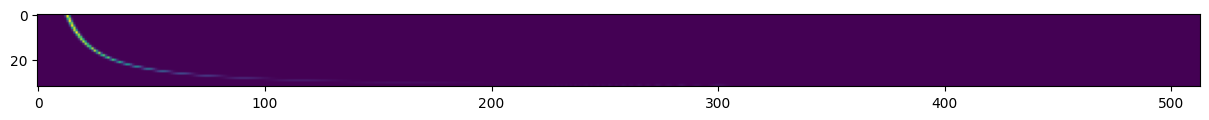

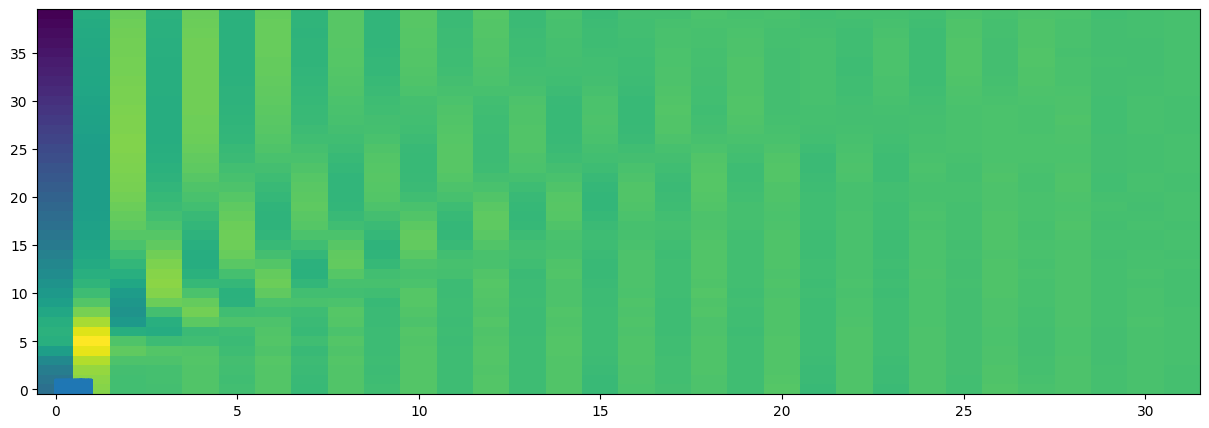

In [6]:
plot_cepstral_coefficients(x, sr, n_fft, n_filters=50)

In [7]:
signal_ = read_wav("/Users/lenagies/Desktop/Master/Thesis/geese/data/GT00742_10_Boris_contact.wav")
print(signal_)

Signal(data=array([-0.00012207, -0.00094607, -0.001648  , ..., -0.00701926,
       -0.00747703, -0.00817896], shape=(5771,), dtype=float32), n_channels=1, sr=44100, quantization='float32')


/Users/lenagies/Desktop/Master/Nebenjob/biosonic/src/biosonic/handle.py:204: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sr, data = wavfile.read(filepath)


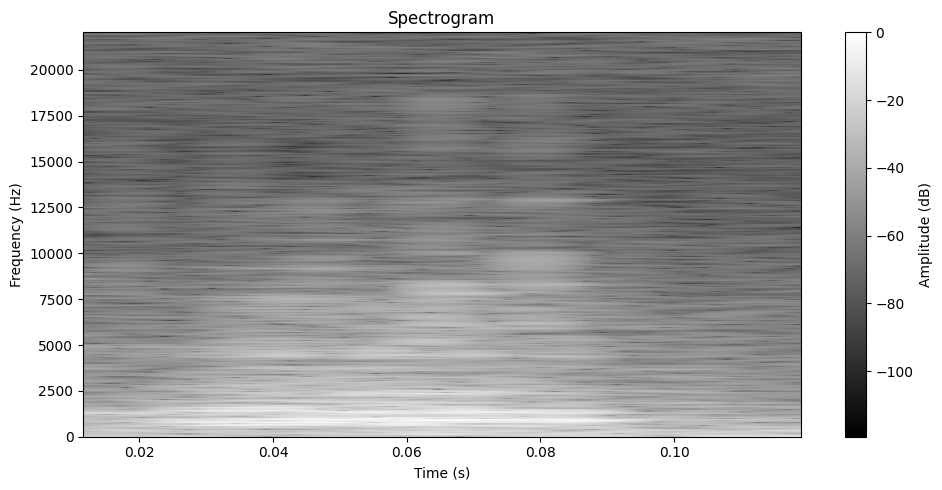

0.0 20195.458359101107


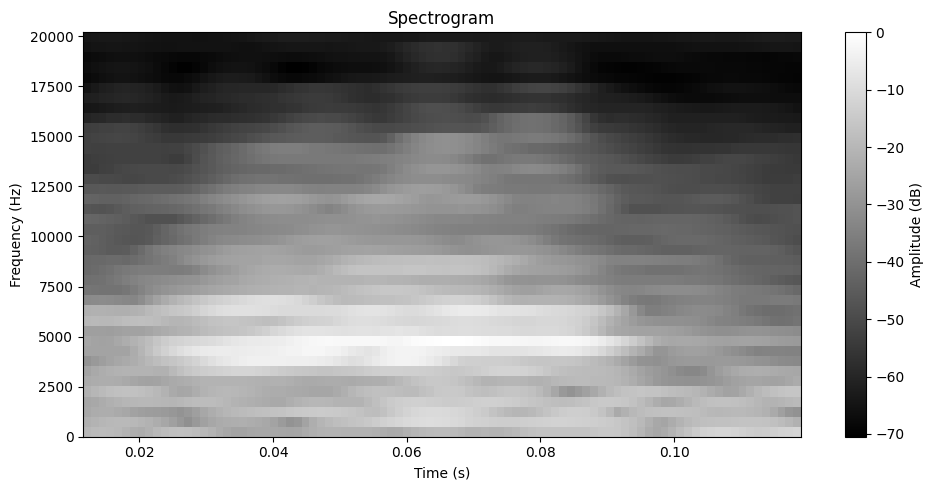

[240.45288692 289.08795415 347.56016575 417.85922617 502.3772863 ]
240.4528869234825 16635.275422053415


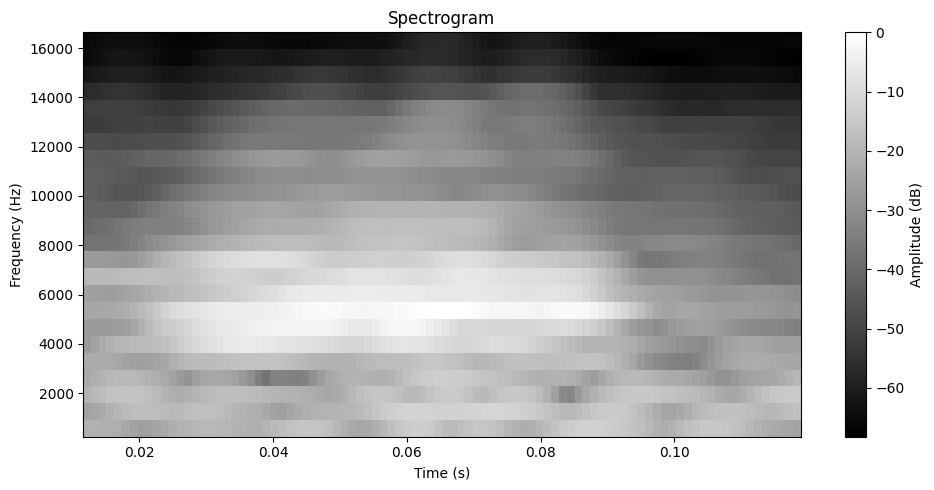

<Axes: title={'center': 'Spectrogram'}, xlabel='Time (s)', ylabel='Frequency (Hz)'>

In [8]:
plot_spectrogram(signal_.data, sr=signal_.sr, window='hann', window_length=n_fft, overlap=95, cmap='grey')
plot_spectrogram(signal_.data, sr=signal_.sr, window='hann', window_length=n_fft, overlap=95, cmap='grey', freq_scale="mel")
plot_spectrogram(signal_.data, sr=signal_.sr, window='hann', window_length=n_fft, overlap=95, cmap='grey', freq_scale="log", flim=(200, 20000), n_bands = 24)

Framed audio shape: (12, 1024)
(513, 12)
(12, 1024)
(12, 513)
(32, 12)


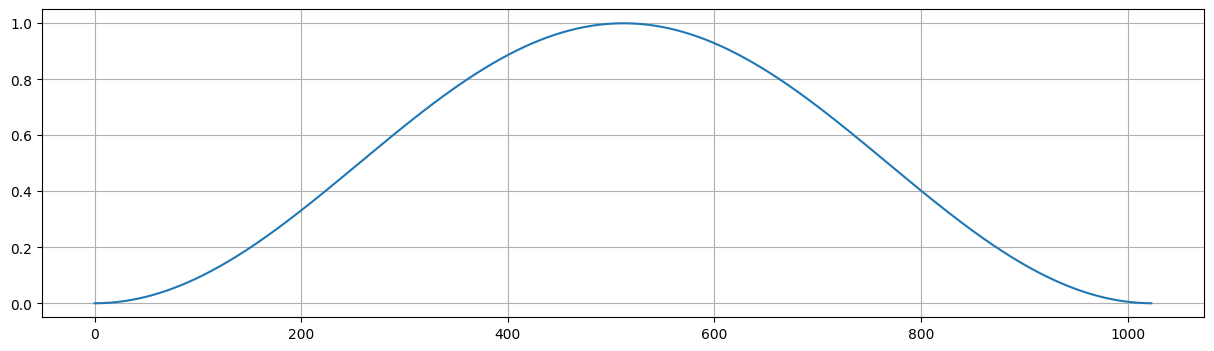

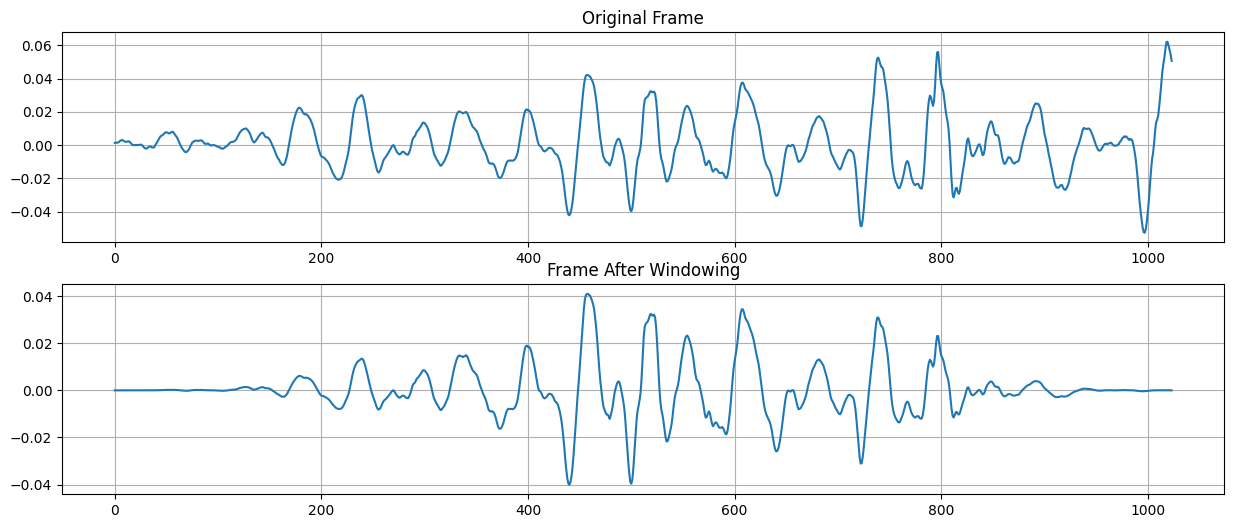

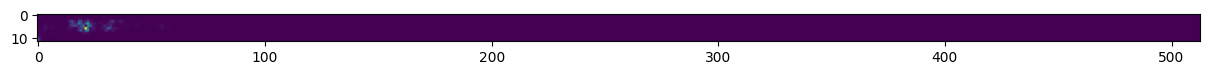

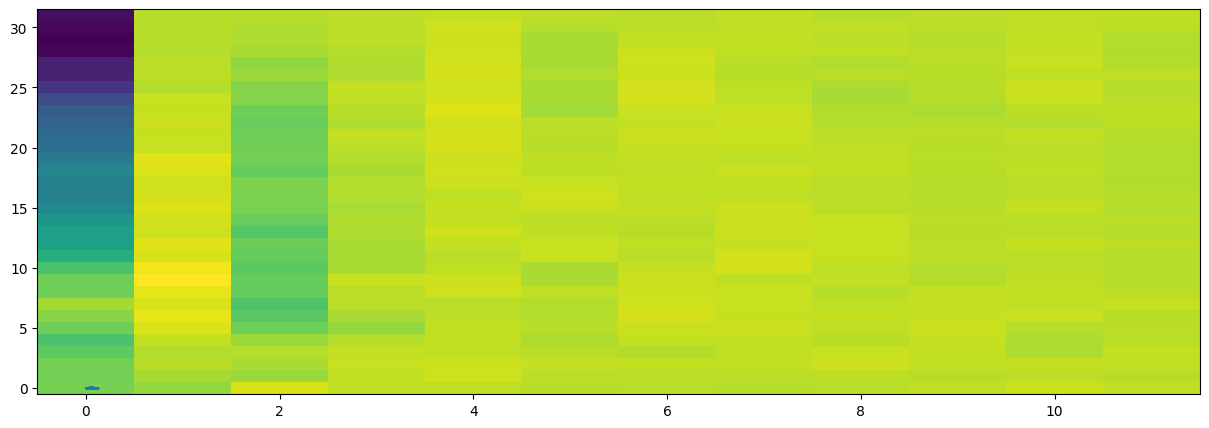

In [9]:
plot_cepstral_coefficients(signal_.data, signal_.sr, n_fft)

[3.9635162e+01 5.4068103e+00 5.8359408e-01 ... 3.7286179e-03 5.8359408e-01
 5.4068103e+00]


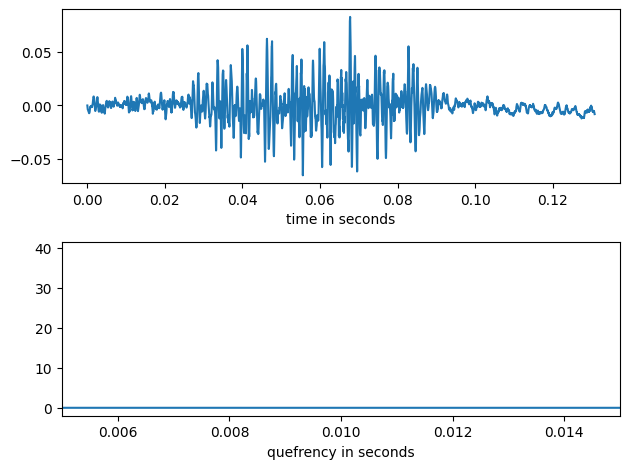

In [10]:
ceps, _ = cepstrum(signal_.data, signal_.sr)
print(ceps)
plot_cepstrum(signal_.data, signal_.sr)

In [11]:
# fbanks, _ = mel_filterbank(10, n_fft, sr)
# ceps = cepstrum(x, sr)
# plot_cepstral_coefficients(x, sr, n_fft)
# #ceps = cepstral_coefficients(x, sr, n_fft, n_filters, n_ceps)

# plot_filterbank_and_cepstrum(
#         fbanks, 
#         sr,
#         n_fft, 
#         ceps, 
#         fmax=None, 
#         title_prefix="")
# plot_cepstrum(x, sr)

0.0 7479.923826452316


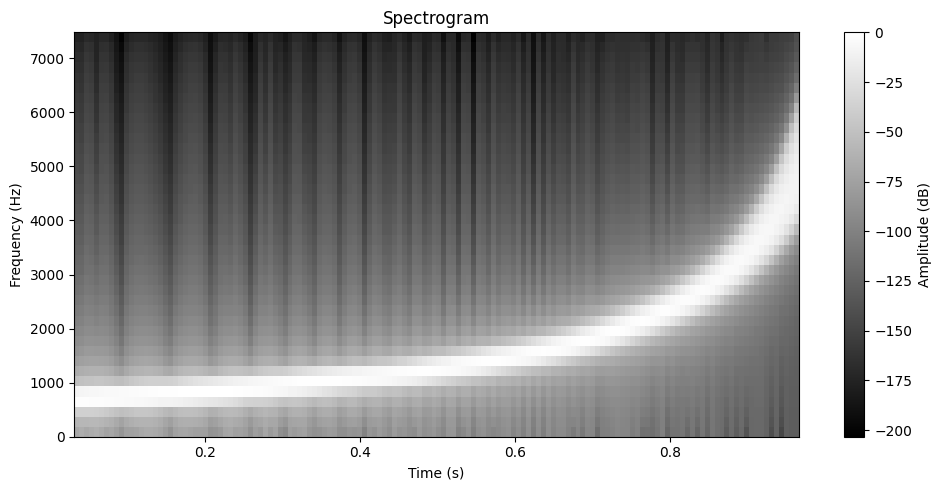

<Axes: title={'center': 'Spectrogram'}, xlabel='Time (s)', ylabel='Frequency (Hz)'>

In [12]:
plot_spectrogram(x, sr=sr, window='hann', window_length=n_fft, overlap=90, cmap='grey', freq_scale="mel", n_bands=40)

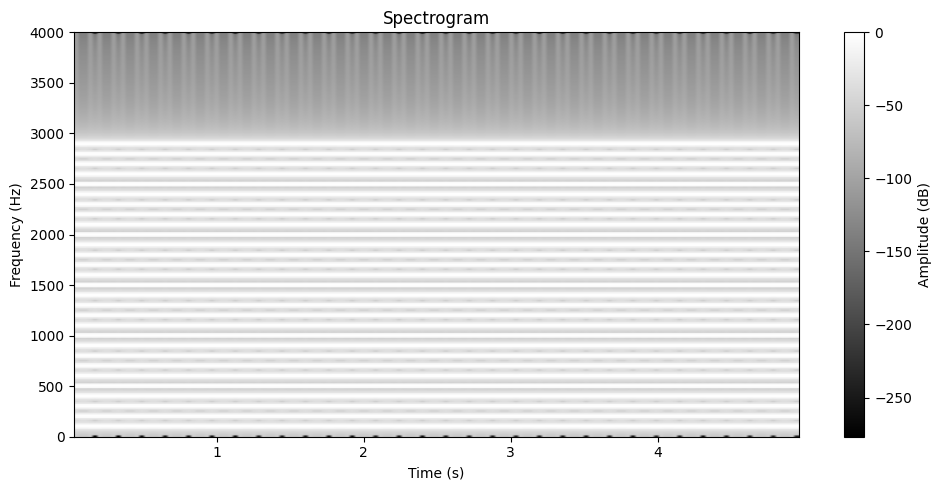

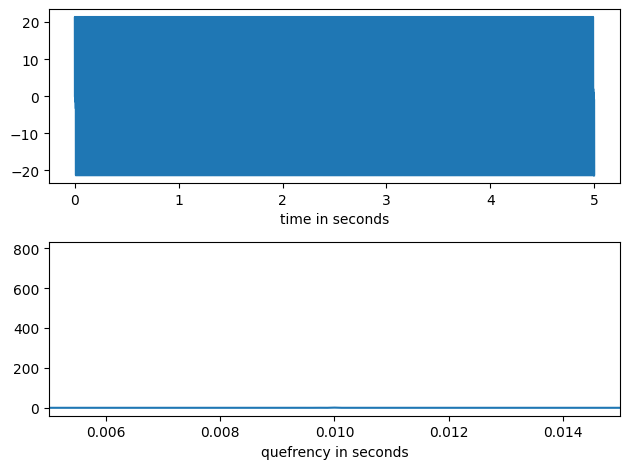

In [13]:
duration = 5.0
sr = 8000.0
samples = int(sr*duration)
t = np.arange(samples) / sr
fundamental = 100.0
harmonics = np.arange(1, 30) * fundamental
data = np.sin(2.0*np.pi*harmonics[:,None]*t).sum(axis=0)

Sx, t, f = spectrogram(data, sr)
plot_spectrogram(data, sr, cmap='grey', window_length=512)
plot_cepstrum(data, sr)

In [14]:
# from biosonic.handle import batch_normalize_wav_files

# batch_normalize_wav_files("/Users/lenagies/Desktop/Master/Nebenjob/biosonic/testfiles", 44100, 1, "float32")

Normalized: GT00001.wav -> /Users/lenagies/Desktop/Master/Nebenjob/biosonic/testfiles/normalized/GT00001.wav
Normalized: GT00704.wav -> /Users/lenagies/Desktop/Master/Nebenjob/biosonic/testfiles/normalized/GT00704.wav
Normalized: GT01056.WAV -> /Users/lenagies/Desktop/Master/Nebenjob/biosonic/testfiles/normalized/GT01056.WAV


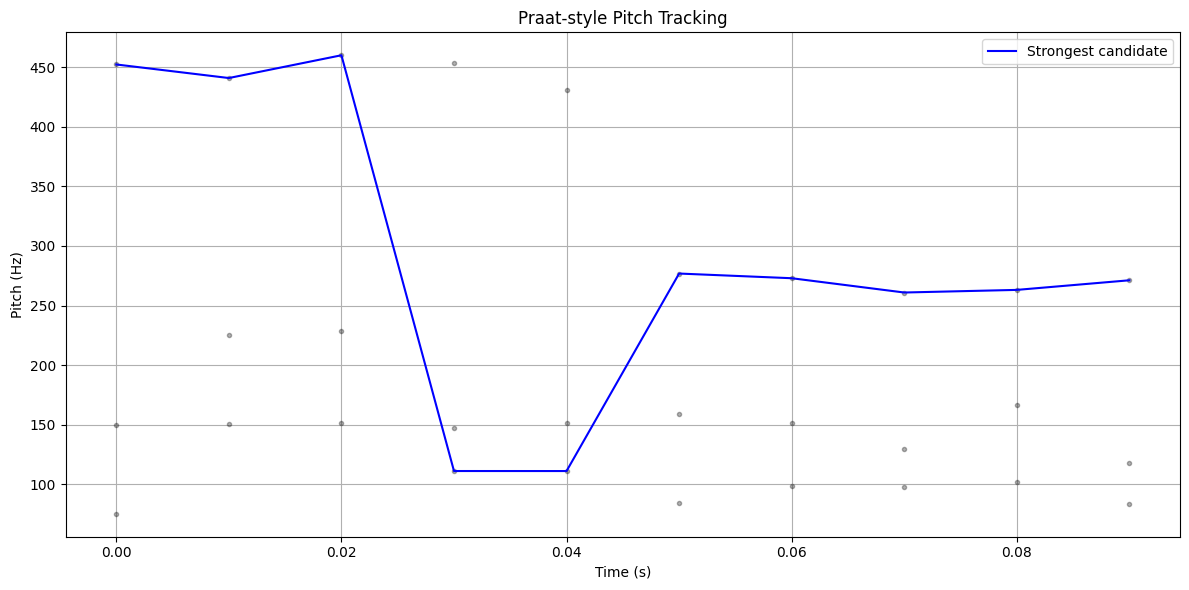

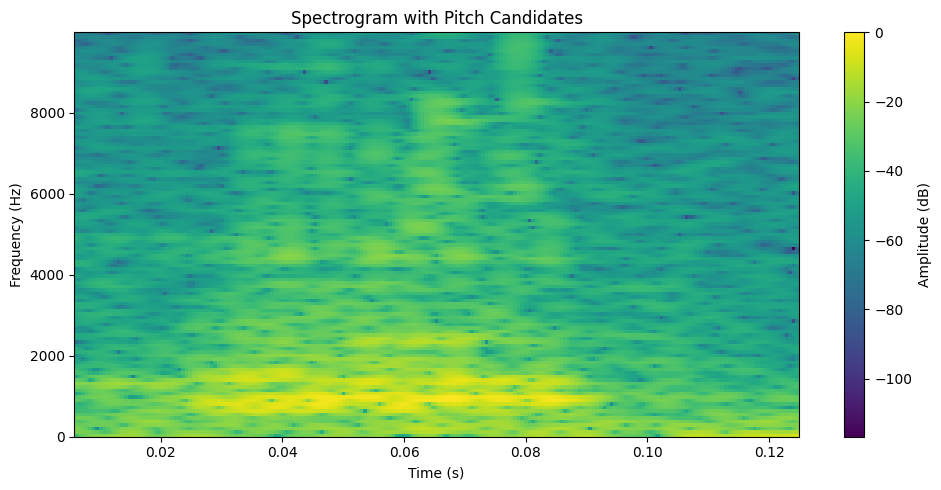

In [16]:
from biosonic.plot import plot_pitch_candidates, plot_pitch_on_spectrogram
from biosonic.compute.spectrotemporal import praat_pitch_tracking

# Run pitch tracking
time_points, candidates = praat_pitch_tracking(signal_.data, signal_.sr)
Sx, t, f = spectrogram(signal_.data, sr=signal_.sr, window='hann', window_length=n_fft, overlap=95)
#plot_spectrogram(Sx, t, f, cmap='grey')

# Plot
plot_pitch_candidates(time_points, candidates)
plot_pitch_on_spectrogram(signal_.data, signal_.sr, time_points, candidates, window_length=n_fft, overlap=95, flim=(0,10000))